1. прочитайте статью https://distill.pub/2016/misread-tsne/
2. найдите реализацию алгоритма t-SNE и PCA. Примените их к датасету «Ирисы Фишера» в двумерное пространство. Какой результат вам нравится больше и почему?


In [39]:
import pandas as pd
import io
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def load_data():
    url="http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
    s=requests.get(url).content
    data=pd.read_csv(io.StringIO(s.decode('utf-8')),index_col=False,header=None)
    #dict  = {4:{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}}
    #data.replace(to_replace=dict,inplace=True)
    data.rename(index=str, columns={0: "sepal_length", 1: "sepal_width", 2:"petal_length", 3:"petal_width", 4:"class"}, inplace=True)
    return  data

data = load_data()


## Изобразим все пары признаков в двумерном пространстве

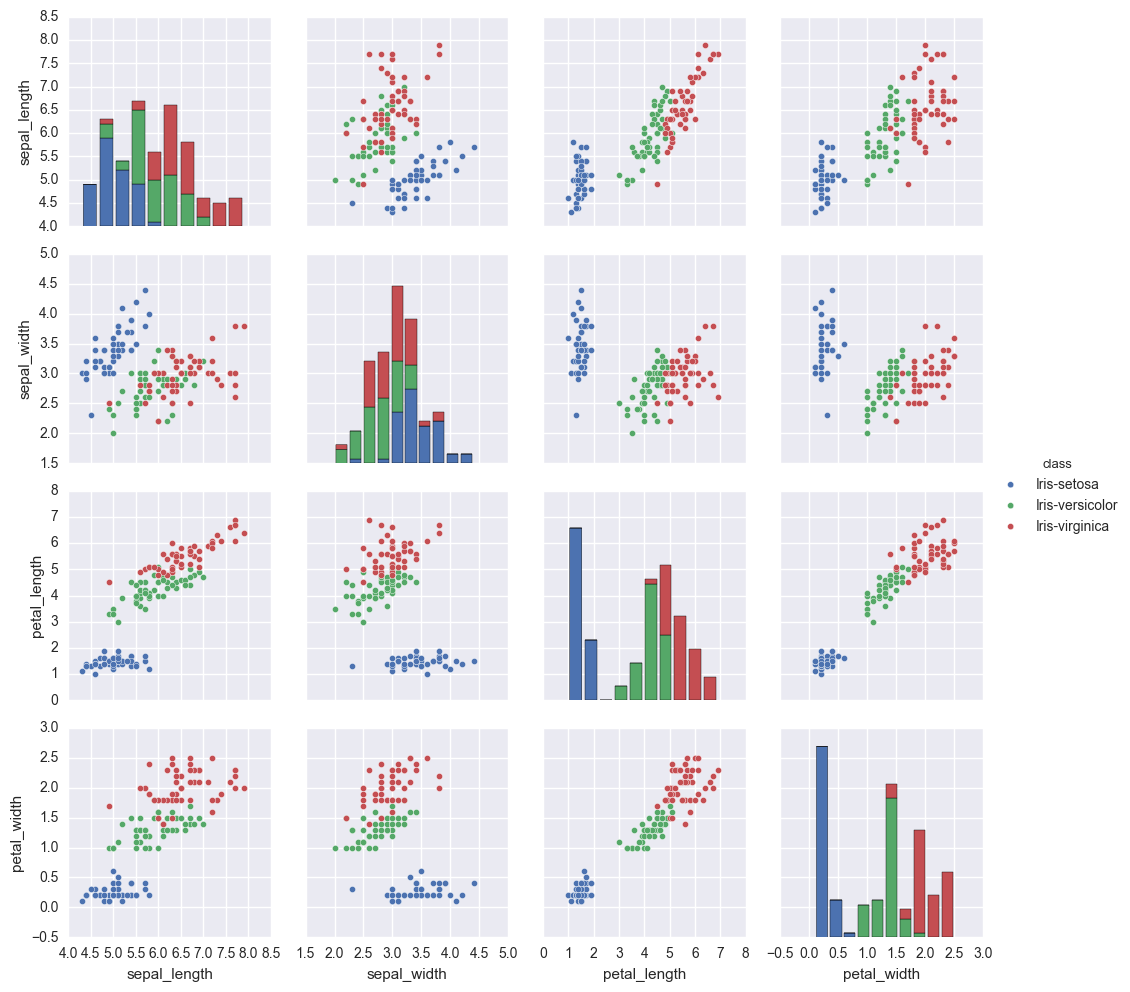

In [40]:
sns.pairplot(data, hue='class')

Класс ирисов setosa хорошо отделим от остальных двух классов. Классы  versicolor и virginica расположены
близко друг к другу.

## Посчитаем корреляцию между признаками

In [41]:
data[["sepal_length","sepal_width","petal_length","petal_width"]].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [42]:
def visualize(title,result):
    plt.title(title)
    setosa_pca = result[0:50]
    versicolor_pca = result[50:100]
    virginica_pca = result[100:150]
    plt.scatter(setosa_pca[:,0], setosa_pca[:,1], marker='o', facecolors='none', edgecolors='b', label='Iris-setosa')
    plt.scatter(versicolor_pca[:,0], versicolor_pca[:,1], marker='o', facecolors='none', edgecolors='g', label='Iris-versicolor')
    plt.scatter(virginica_pca[:,0], virginica_pca[:,1], marker='o', facecolors='none', edgecolors='r', label='Iris-virginica')
    plt.legend(loc=4)
    plt.show()

# Применим реализации PCA и t-SNE из библиотеки sklearn.

### PCA

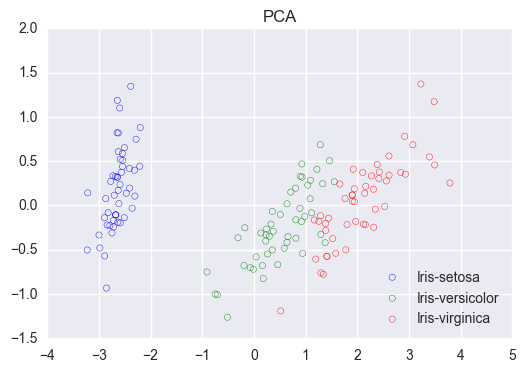

Explained variance ratio:  [ 0.92461621  0.05301557]


In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2 ) #, whiten=True, svd_solver='randomized'
pca_result = pca.fit_transform(data[["sepal_length","sepal_width","petal_length","petal_width"]].values)
visualize('PCA',pca_result)
print 'Explained variance ratio: ', pca.explained_variance_ratio_

### t-SNE

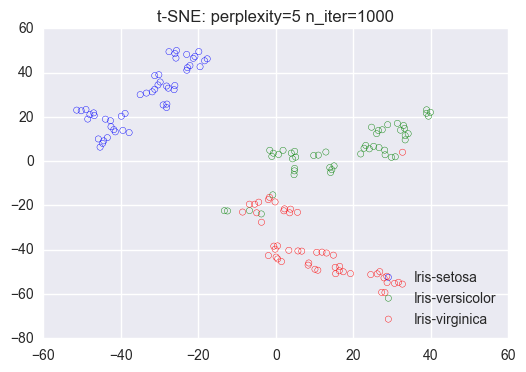

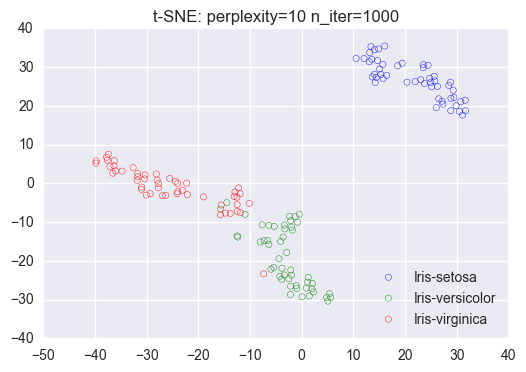

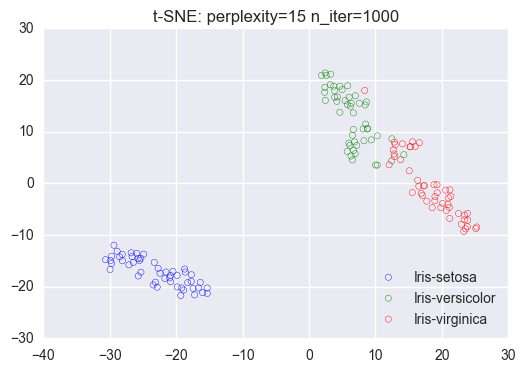

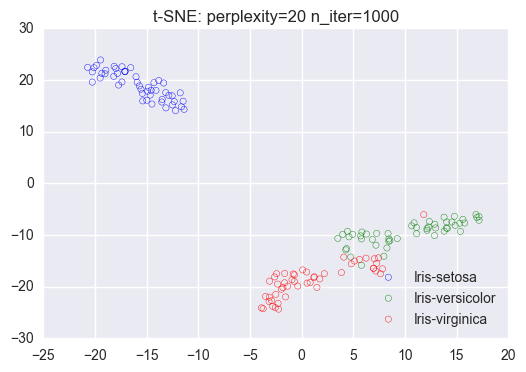

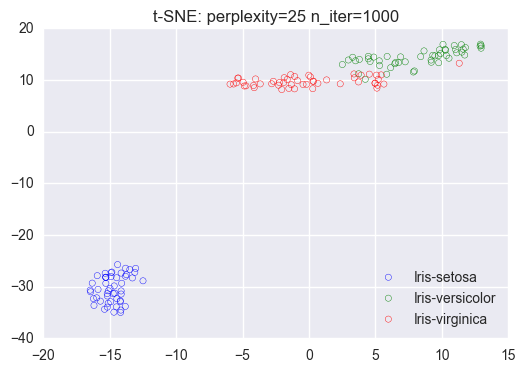

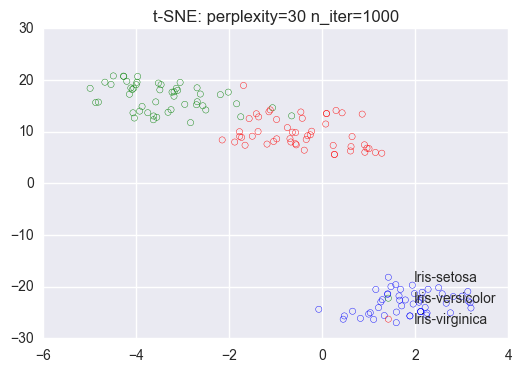

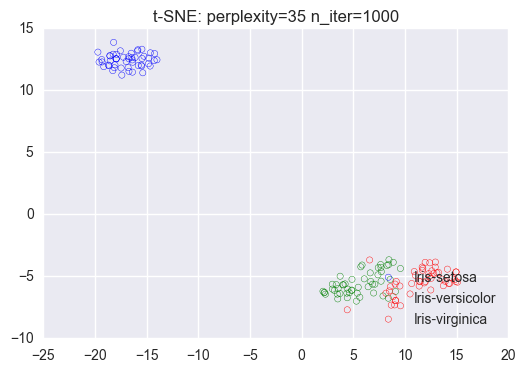

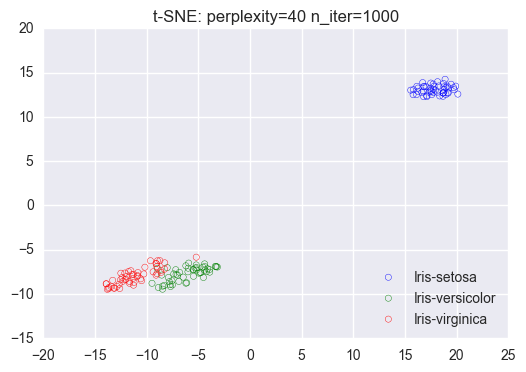

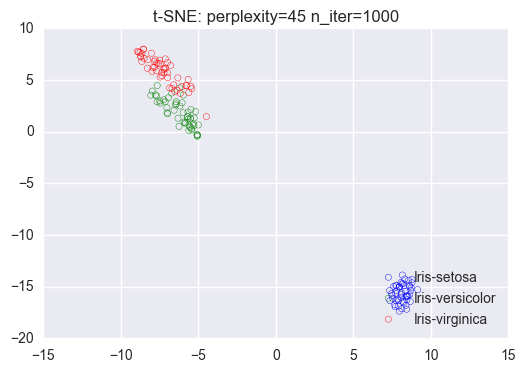

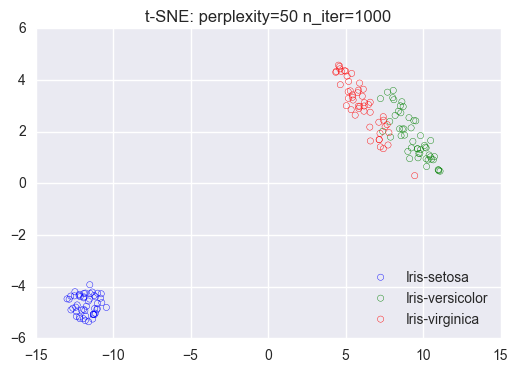

In [44]:
from  sklearn.manifold import TSNE

params = xrange(5,55,5)
for i, perplexity  in enumerate(params):
   
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=1000)
    tsne_result = tsne.fit_transform(data[["sepal_length","sepal_width","petal_length","petal_width"]].values)
    
    visualize("t-SNE: perplexity=%d n_iter=%d" %(perplexity,n_iter),tsne_result)
    

В целом результаты PCA и t-SNE схожи. Класс ирисов setosa как был хорошо отделим от остальных двух классов, так и остался хорошо отделимым. Классы  versicolor и virginica также остались близки друг к другу.

Результат PCA мне нравится больше, т.к всего 4 признака и некоторые пары из них сильно коррелируют, то разумнее применять PCA, который в отличие от t-SNE обладает рядом преимуществ. PCA детерминированный, вычислительно эффективнее и работает быстрее, можно обучить на одной выборке и применить к другой из того же распределения, трактуем.

T-SNE позволяет получить  более разделимые классы (versicolor от virginica), однако в общем случае расстояние между классами на крафике ни о чем не говорит, если сразу не получилось получить "красивую" картинку, то необходимо варьировать perplexity и смотреть сходимость, что более трудоемко в сравнение с PCA.